
# Capstone Project 

# Author : Hamidreza Salahi

# Notebook : 2


This notebook deals with Exploratory Data Analysis (EDA). The goal here is (i) to provide some insight into the dataset and (ii) doing further data cleaning 

## Contents:
* [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))


In [14]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
#Importing clean data
loan_sample = pd.read_csv('C:\\Users\\hamid\\Desktop\\Capstone\\Data\\loan_sample.csv')

loan_sample.head()

,loan_status,last_fico_avg,int_rate,term,fico_avg,acc_open_past_24mths,bc_open_to_buy,num_tl_op_past_12m,funded_amnt,loan_amnt,...,application_type,emp_length,grade,sub_grade,emp_title,home_ownership,verification_status,purpose,title,addr_state
0,0,697.0,20.55,60,702.0,7.0,17662.0,3.0,32025.0,32025.0,...,1,7,D,D2,office manager,MORTGAGE,Source Verified,debt_consolidation,Debt consolidation,MN
1,0,682.0,9.99,36,687.0,4.0,1230.0,3.0,11200.0,11200.0,...,0,10,B,B3,FUEL SYSTEMS MAINTENANCE,RENT,Verified,debt_consolidation,Debt consolidation,FL
2,0,692.0,15.05,36,662.0,2.0,1830.0,1.0,20000.0,20000.0,...,0,1,C,C4,Registered Nurse,RENT,Verified,debt_consolidation,Debt consolidation,FL
3,1,507.0,11.53,36,672.0,2.0,274.0,1.0,10000.0,10000.0,...,0,1,B,B5,Product Manager,RENT,Not Verified,credit_card,Credit card refinancing,IL
4,1,507.0,17.27,60,662.0,5.0,3987.0,1.0,11050.0,11050.0,...,0,10,D,D3,SLS,MORTGAGE,Source Verified,debt_consolidation,Debt consolidation,CA


In [79]:
loan_sample.shape

(235027, 50)

In the first step of EDA, I am going to look at the correlation between the various features. There are columns that I expect to be highly correlated e.g., the loan amount (loan_amnt) and installment should be highly possitively correlated i.e., the more amount of loan you are approved for, the more you must pay back.  <br>
I will drop columns with high correlation. By *high* correlation I mean any correlation whose **magnitude** is greater than 0.5

<AxesSubplot:>

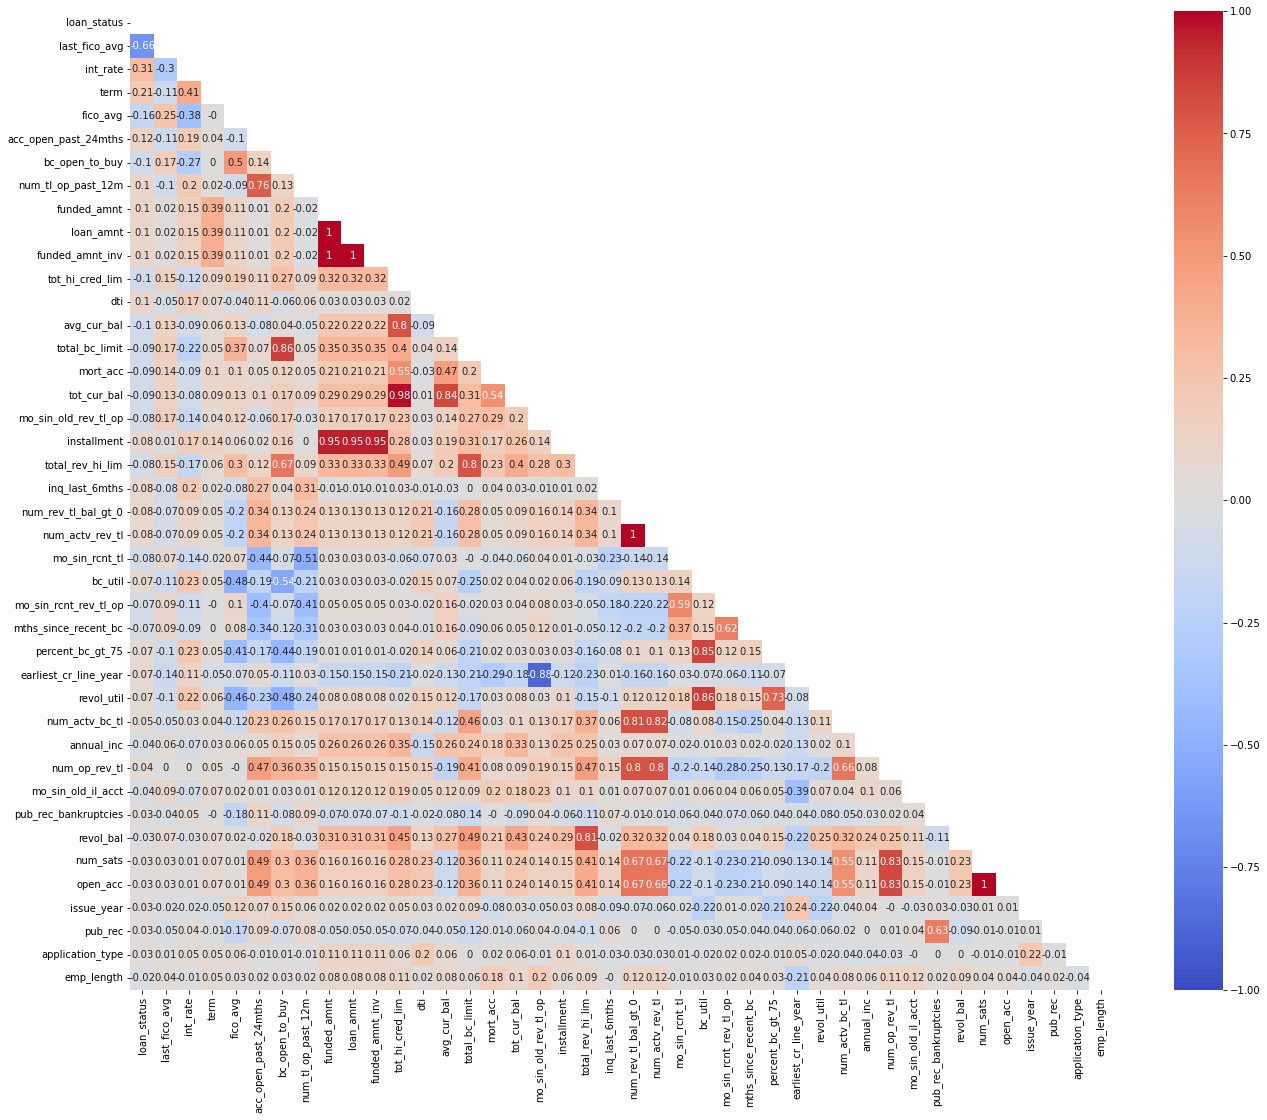

In [80]:
mask = np.triu(loan_sample.corr())
plt.figure(figsize=(22, 18))
sns.heatmap(round(loan_sample.corr(),2), 
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1, 
            vmax = 1,
            mask = mask)

There exists relatively high correlation between some columns e.g., loan amount (loan_amnt) and fundend_amnt_inv (The total amount committed by investors for that loan at that point in time). A very high correlation between loan_amnt and installment is seen (as expected). Also, pub_rec_bankruptcies (number of public record bankruptcies) and pub_rec (number of derogatory public records) are highly correlated. <br>
To remove collinearity from our dataset, I will drop the following columns: <br>
* `bc_open_to_buy`
* `num_tl_op_past_12m`
* `funded_amnt_inv`
* `installment`
* `avg_cur_bal`
* `mort_acc`
* `tot_cur_bal`
* `total_bc_limit`
* `mo_sin_old_rev_tl_op`
* `total_rev_hi_lim`
* `num_rev_tl_bal_gt_0`
* `num_actv_rev_tl`
* `bc_util`
* `percent_bc_gt_75`
* `num_actv_bc_tl`
* `num_op_rev_tl`
* `pub_rec_bankruptcies`
* `num_sats`

In [81]:
drop_cols = ['bc_open_to_buy','num_tl_op_past_12m','funded_amnt_inv','installment','avg_cur_bal'\
            ,'mort_acc', 'tot_cur_bal', 'total_bc_limit','mo_sin_old_rev_tl_op','total_rev_hi_lim',\
             'num_rev_tl_bal_gt_0','num_actv_rev_tl','bc_util','percent_bc_gt_75','num_actv_bc_tl','num_op_rev_tl'\
            ,'pub_rec_bankruptcies', 'num_sats']
loan_sample.drop(columns=drop_cols, inplace=True)

In [82]:
loan_sample.shape

(235027, 32)

Let's look at the distribution of all numeric columns. <br>
**NOTE: The df.hist does not plot the categorical columns. We will investigate those columns later on**

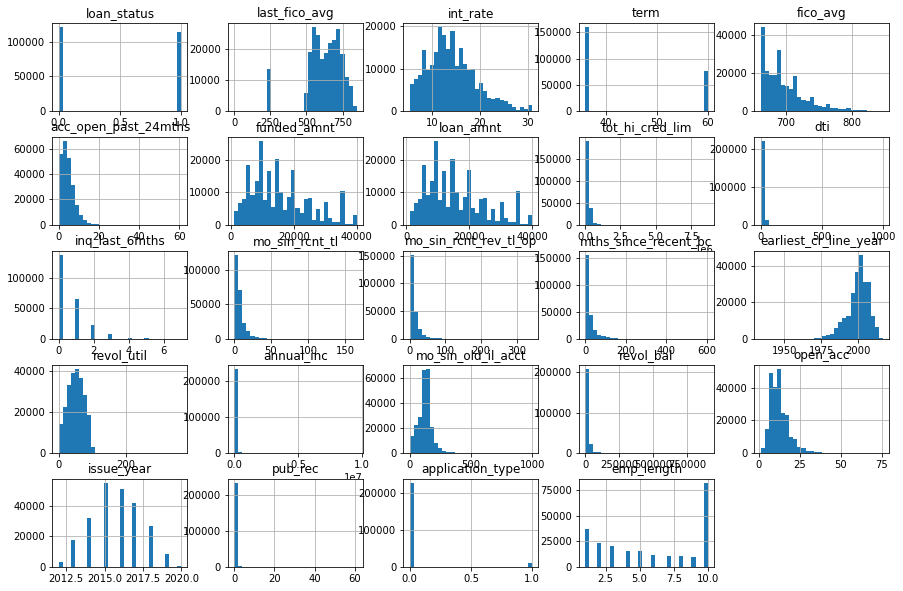

In [83]:
loan_sample.hist(bins=30, figsize=(15, 10))
plt.show()

The issue here is that some of the distribtions are highly skewed to the right e,g., `dti` , `annual_inc` and `pub_rec`. 

In [84]:
loan_sample.skew().sort_values(ascending=False)

C:\Users\hamid\AppData\Local\Temp\ipykernel_9412\3249953530.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loan_sample.skew().sort_values(ascending=False)


annual_inc               51.664799
dti                      18.582458
pub_rec                  14.209622
revol_bal                 9.099822
application_type          4.788549
mo_sin_rcnt_tl            3.870659
mo_sin_rcnt_rev_tl_op     3.588544
mths_since_recent_bc      3.345063
tot_hi_cred_lim           3.142355
inq_last_6mths            1.682177
acc_open_past_24mths      1.397557
open_acc                  1.335909
fico_avg                  1.326968
term                      0.769269
funded_amnt               0.708989
loan_amnt                 0.708983
int_rate                  0.672246
mo_sin_old_il_acct        0.380865
loan_status               0.055803
issue_year               -0.003328
revol_util               -0.033915
emp_length               -0.120698
earliest_cr_line_year    -0.969588
last_fico_avg            -1.281985
dtype: float64

In [85]:
cumsum_annual_inc = loan_sample["annual_inc"].value_counts(normalize=True).sort_index().cumsum()

The issue with right skew should not create any problem as we will use MinMaxScaler in the modeling phase.

Next, lets look at the distribution of the categorical columns

In [86]:
# list of categorical columns
cat_col_name=loan_sample.select_dtypes(include='object').columns
cat_col_name

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'purpose', 'title', 'addr_state'],
      dtype='object')

In [87]:
loan_sample['emp_title'].value_counts()

Teacher              4189
Manager              4043
Owner                2481
Driver               1918
Registered Nurse     1711
                     ... 
Casting Director        1
Culinary director       1
Sr buyer                1
 Store manger           1
Speech Assistant        1
Name: emp_title, Length: 87552, dtype: int64

All the categorical columns have reasonable number of categories except for `emp_title` which takes over than 100000 different values. I will drop this column.

In [88]:
loan_sample.drop(columns=['emp_title'], inplace=True)

The two columns `title` and `purpose` are very similar. 

In [89]:
loan_sample['title'].value_counts()

Debt consolidation           128759
Credit card refinancing       45981
Home improvement              13919
Other                         13209
Major purchase                 4766
                              ...  
Resurfacing                       1
timecard                          1
me                                1
Loan for Home Improvement         1
credit card consiladation         1
Name: title, Length: 6900, dtype: int64

In [90]:
loan_sample['purpose'].value_counts()

debt_consolidation    139116
credit_card            49701
home_improvement       14740
other                  13850
major_purchase          5037
medical                 2812
small_business          2686
car                     2190
moving                  1672
vacation                1570
house                   1400
renewable_energy         153
wedding                  100
Name: purpose, dtype: int64

I will drop the `title` column as it is less consistant and has more fields 

In [91]:
loan_sample.drop(columns=['title'], inplace=True)

In [92]:
# list of categorical columns
cat_col_name=loan_sample.select_dtypes(include='object').columns
cat_col_name

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'addr_state'],
      dtype='object')

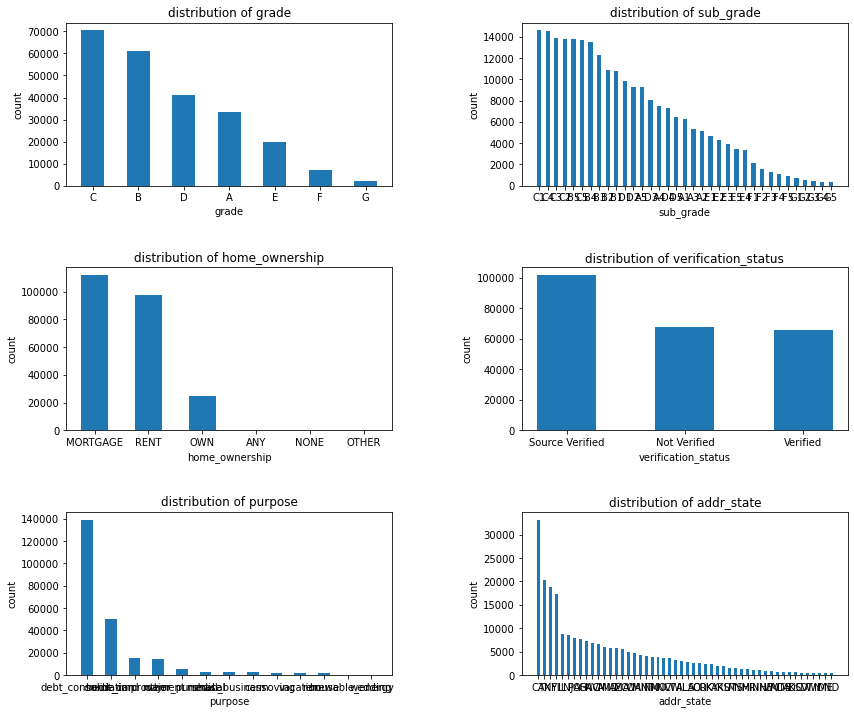

In [93]:

fig, axes=plt.subplots(3,2,figsize=(14,12) )
i=1
for name in (cat_col_name):
    categories = loan_sample[name].value_counts().index
    counts = loan_sample[name].value_counts().values
    plt.subplot(3,2,i)
    plt.bar(categories, counts, width=0.5)
    plt.xlabel(name)
    plt.ylabel("count")
    plt.title(f'distribution of {name}')
    i+=1
    plt.subplots_adjust( wspace=0.4, hspace=0.5)
plt.show()


Let's have a closer look at `purpose`, `sub_grade`, `addr_state` (The x labels are not clear in the above figure)  

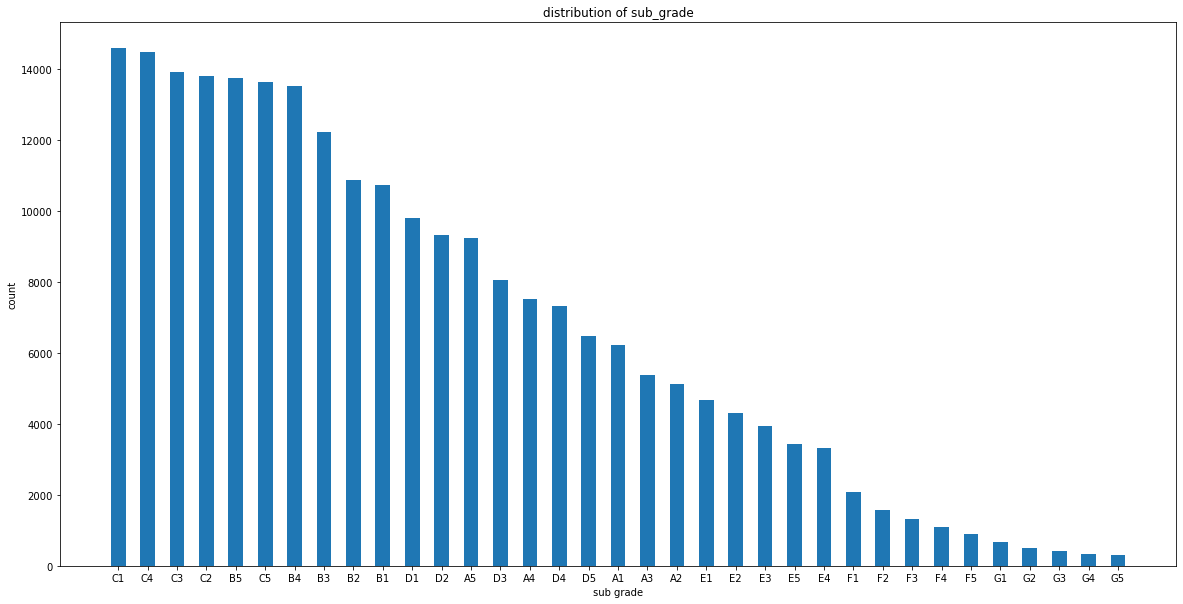

In [94]:
categories = loan_sample['sub_grade'].value_counts().index
counts = loan_sample['sub_grade'].value_counts().values
plt.figure(figsize=(20,10))
plt.bar(categories, counts, width=0.5)
plt.xlabel('sub grade')
plt.ylabel('count')
plt.title("distribution of sub_grade")
plt.show()

It seems that `grade` and `sub_grade` are related. Actually, the `sub_grade` column is more detailed than `grade` so we do not need to keep `grade`. 

In [95]:
loan_sample.drop(columns=['grade'], inplace=True)

A1    5472
A2    4325
A3    4300
A4    5816
A5    6744
B1    7509
B2    7185
B3    7838
B4    8021
B5    7818
C1    7572
C2    6793
C3    6469
C4    6261
C5    5746
D1    3925
D2    3586
D3    2913
D4    2496
D5    2135
E1    1495
E2    1343
E3    1115
E4     920
E5     908
F1     530
F2     349
F3     308
F4     260
F5     170
G1     155
G2     111
G3      92
G4      60
G5      51
Name: sub_grade, dtype: int64

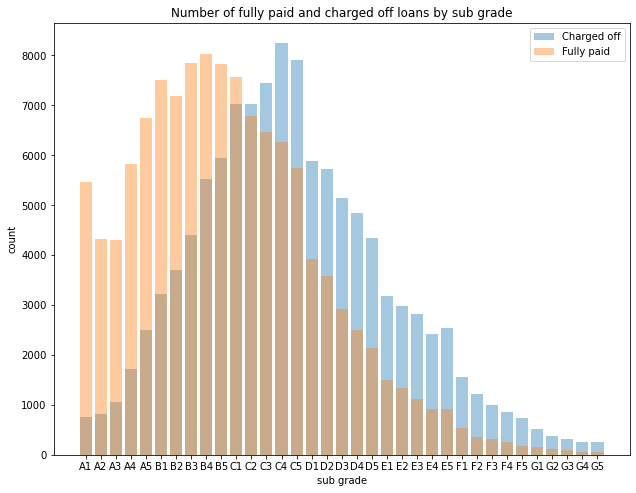

In [136]:
fully_paid_by_subgrade = loan_sample.loc[loan_sample['loan_status']==0, 'sub_grade'].value_counts().sort_index()
charged_off_by_subgrade = loan_sample.loc[loan_sample['loan_status']==1, 'sub_grade'].value_counts().sort_index()

fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(charged_off_by_subgrade.index , charged_off_by_subgrade.values , alpha=0.4 , label='Charged off')
ax.bar(fully_paid_by_subgrade.index , fully_paid_by_subgrade.values , alpha=0.4 , label='Fully paid')
plt.legend()
plt.title('Number of fully paid and charged off loans by sub grade')
plt.xlabel('sub grade')
plt.ylabel('count')
plt.show()

It is seen that the loan status does depend on sub grade. We can look at the relative ratio of fully paid and charged off loans to get a btter understanding.

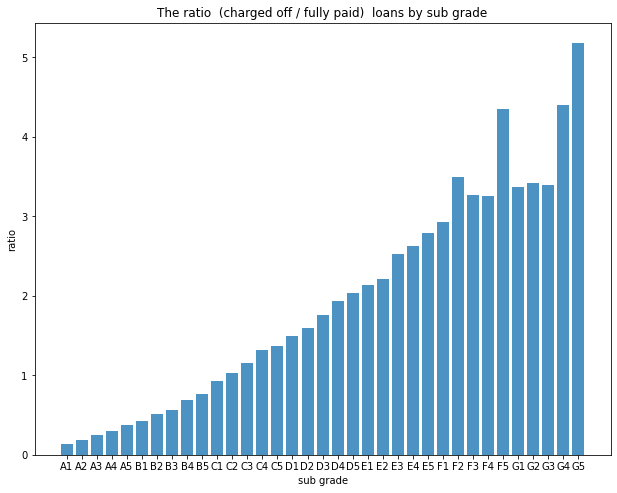

In [138]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(charged_off_by_subgrade.index , charged_off_by_subgrade.values/fully_paid_by_subgrade.values , alpha=0.8)
plt.title('The ratio  (charged off / fully paid)  loans by sub grade')
plt.xlabel('sub grade')
plt.ylabel('ratio')
plt.show()

It is clearely seen that sub_grade is an important categorical feature. Going from A_1 to G_5, an increasing trend in the number of charged off loans is seen. Thus sub_grade is an important feature. <br>  
It is noted that this graph does not display the actual ratio of the fully paid and charged off loans because in the original dataset, there are much more fully paid loans compared to charged off loans. The reason that we see this behavior here is that we deliberately chose a balanced sample for our loan dataset i.e., if we had the same number of fully paid and charged off loans, the figure above would have been the ratio of the two categories by sub grade. <br>



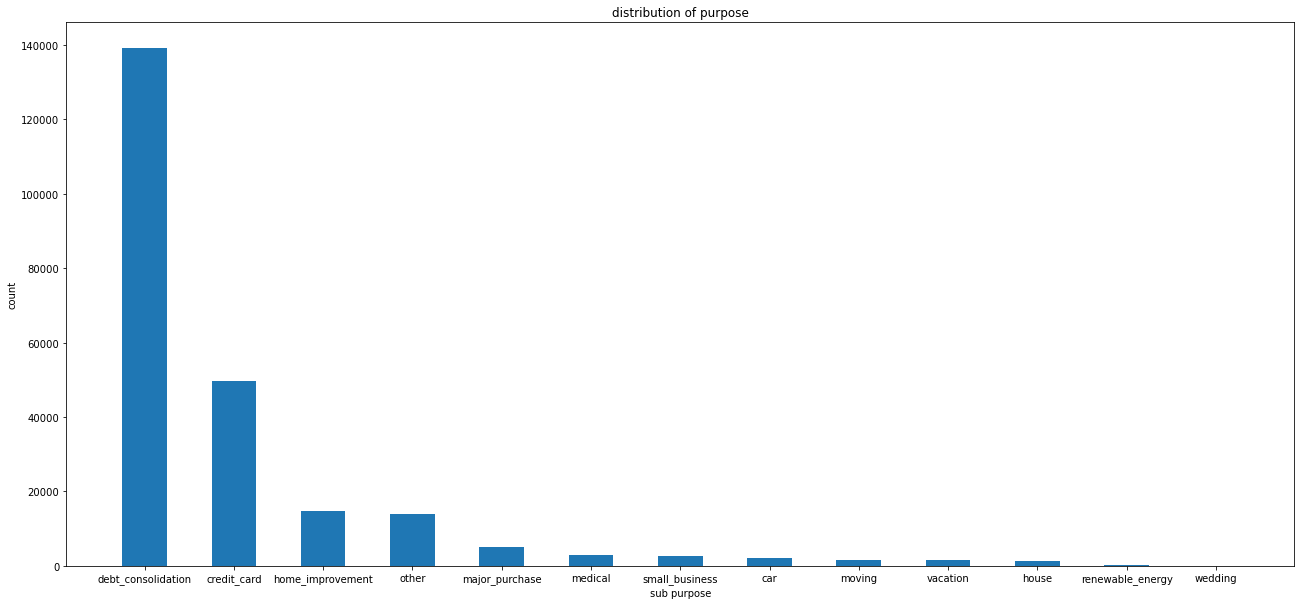

In [135]:
categories = loan_sample['purpose'].value_counts().index
counts = loan_sample['purpose'].value_counts().values
plt.figure(figsize=(22,10))
plt.bar(categories, counts, width=0.5)
plt.xlabel('sub purpose')
plt.ylabel('count')
plt.title("distribution of purpose")
plt.show()

The top 3 purposes of the loans are: <br>
1- debt consolidation <br>
2- credit card <br>
3- home improvement <br>

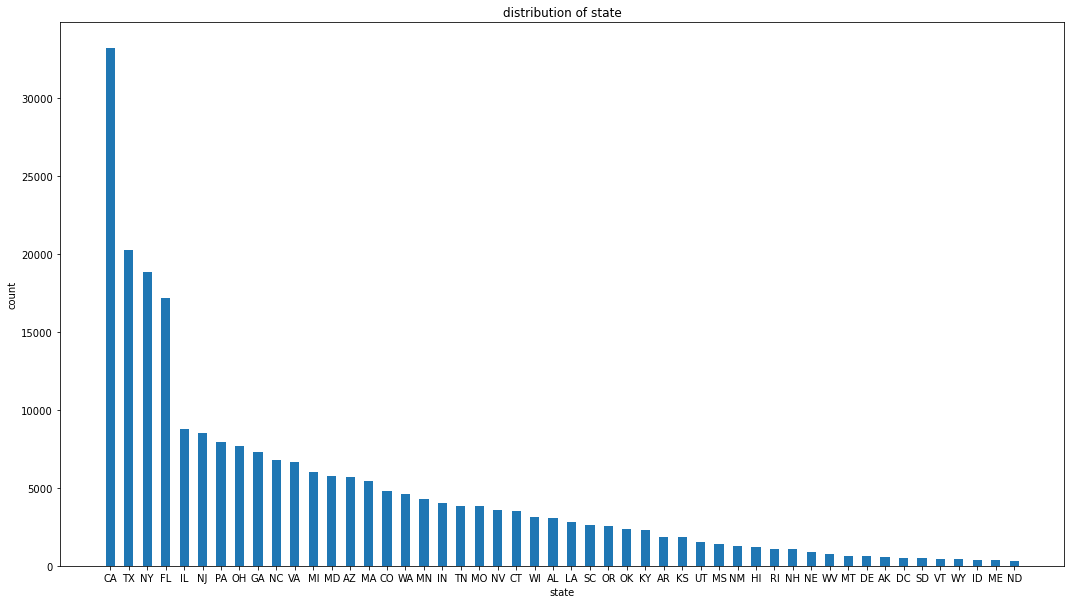

In [64]:
categories = loan_sample['addr_state'].value_counts().index
counts = loan_sample['addr_state'].value_counts().values
plt.figure(figsize=(18,10))
plt.bar(categories, counts, width=0.5)
plt.xlabel('state')
plt.ylabel('count')
plt.title("distribution of state")
plt.show()

There are too many states and it might confuse the model if we try to use onehotcode to dumify the state category. Let's look at the ratio of fully paid and charged off loans by state.

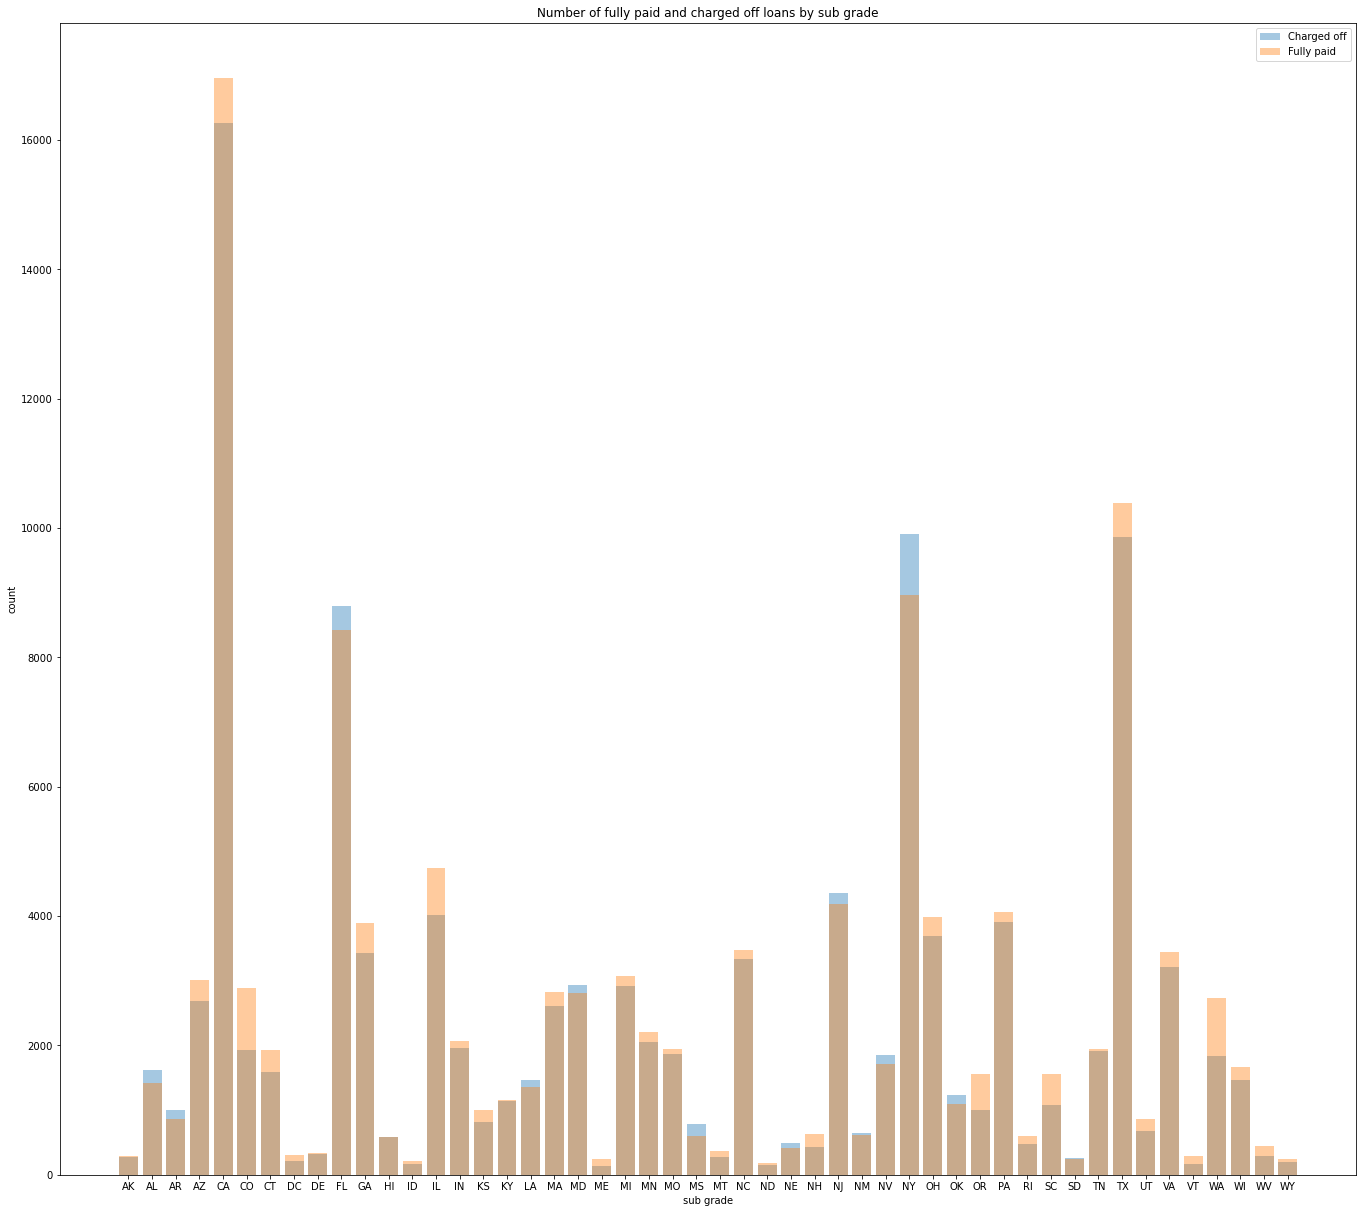

In [141]:
fully_paid_by_state = loan_sample.loc[loan_sample['loan_status']==0, 'addr_state'].value_counts().sort_index()
charged_off_by_state = loan_sample.loc[loan_sample['loan_status']==1, 'addr_state'].value_counts().sort_index()

fig = plt.figure(figsize=(18,16))
ax = fig.add_axes([0,0,1,1])
ax.bar(charged_off_by_state.index , charged_off_by_state.values , alpha=0.4 , label='Charged off')
ax.bar(fully_paid_by_state.index , fully_paid_by_state.values , alpha=0.4 , label='Fully paid')
plt.legend()
plt.title('Number of fully paid and charged off loans by sub grade')
plt.xlabel('sub grade')
plt.ylabel('count')
plt.show()

The distribution of fully paid and charged off loans are about the same in all states. Therefore, we can drop this column.

In [142]:
loan_sample.drop(columns=['addr_state'], inplace=True)

In [143]:
# % of each category in home_ownership column 
loan_sample['home_ownership'].value_counts()/loan_sample['home_ownership'].count()

MORTGAGE    0.476715
RENT        0.416522
OWN         0.106039
ANY         0.000681
NONE        0.000026
OTHER       0.000017
Name: home_ownership, dtype: float64

In `home_ownership` column, `ANY`, `OTHER`, `NONE` are a very small fraction of the column. Im going to map `Any` --> `OTHER`, `NONE`--> `OTHER`

In [144]:
loan_sample.replace({'home_ownership': {'ANY':'OTHER', 'NONE':'OTHER'}}, inplace=True)
loan_sample['home_ownership'].value_counts()

MORTGAGE    112041
RENT         97894
OWN          24922
OTHER          170
Name: home_ownership, dtype: int64

`application_type` and `loan_status` are binary columns which can be mapped to 0 and 1

The last next step is categorical data encoding using OneHotEncoder i.e., convert categorical columns to numeric features

In [146]:
categorical_cols = loan_sample.select_dtypes(include='object').columns
categorical_cols

Index(['sub_grade', 'home_ownership', 'verification_status', 'purpose'], dtype='object')

In [147]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

transformed_data = onehotencoder.fit_transform(loan_sample[categorical_cols])


In [148]:
# Name of all columns of onehotencoder
category_name = []
for rows in range (0, len(onehotencoder.categories_)):
    for cols in range(0 , len(onehotencoder.categories_[rows])):
        category_name.append(onehotencoder.categories_[rows][cols])


In [149]:
# the above transformed_data is an array so convert it to dataframe
encoded_data = pd.DataFrame(transformed_data.toarray(), columns=category_name)

# now concatenate the original data and the encoded data using pandas
loan_sample = pd.concat([loan_sample, encoded_data], axis=1)

In [151]:
loan_sample.shape

(235027, 83)

In [152]:
loan_sample.to_csv('C:\\Users\\hamid\\Desktop\\Capstone\\Data\\loan_sample_after_EDA.csv' , index=False)